Credit for Code: https://www.kaggle.com/code/brsdincer/brain-tumor-prediction-new-data-full-explanation

Importing Libraries and ignoring warnings

Doubts:

Batches -> Data batch and label batch -> what is it?
Ask about image data generator
ask about validation set

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from tensorflow.keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

Organization of the Data

Training Set

In [80]:
#Training Set

No_DataPath = Path("brain-tumor-detection/no/")
Yes_DataPath = Path("brain-tumor-detection/yes/")

No_jpgList = list(No_DataPath.glob(r"*.jpg"))
Yes_jpgList = list(Yes_DataPath.glob(r"*.jpg"))

In [81]:
#Checking whether list works

print(No_jpgList[0:7])
print("-----------------------"*5)
print(Yes_jpgList[0:7])

[WindowsPath('brain-tumor-detection/no/no0.jpg'), WindowsPath('brain-tumor-detection/no/no1.jpg'), WindowsPath('brain-tumor-detection/no/no10.jpg'), WindowsPath('brain-tumor-detection/no/no100.jpg'), WindowsPath('brain-tumor-detection/no/no1000.jpg'), WindowsPath('brain-tumor-detection/no/no1001.jpg'), WindowsPath('brain-tumor-detection/no/no1002.jpg')]
-------------------------------------------------------------------------------------------------------------------
[WindowsPath('brain-tumor-detection/yes/y0.jpg'), WindowsPath('brain-tumor-detection/yes/y1.jpg'), WindowsPath('brain-tumor-detection/yes/y10.jpg'), WindowsPath('brain-tumor-detection/yes/y100.jpg'), WindowsPath('brain-tumor-detection/yes/y1000.jpg'), WindowsPath('brain-tumor-detection/yes/y1001.jpg'), WindowsPath('brain-tumor-detection/yes/y1002.jpg')]


In [82]:
#creating a list with both yes and no pictures

yn_List = []

for i in No_jpgList:
    yn_List.append(i)

for i in Yes_jpgList:
    yn_List.append(i)

print(yn_List[0:5])

[WindowsPath('brain-tumor-detection/no/no0.jpg'), WindowsPath('brain-tumor-detection/no/no1.jpg'), WindowsPath('brain-tumor-detection/no/no10.jpg'), WindowsPath('brain-tumor-detection/no/no100.jpg'), WindowsPath('brain-tumor-detection/no/no1000.jpg')]


In [83]:
#Creating a list of catagories for better organization

jpgCat = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], yn_List))
print(jpgCat[0:10])



['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [84]:
#Creating Pandas Table

jpgPath_series = pd.Series(yn_List, name="JPG").astype(str)
jpgCat_series = pd.Series(jpgCat, name="Category")

TrainData = pd.concat([jpgPath_series, jpgCat_series], axis = 1)

#Shuffling the data
TrainData = TrainData.sample(frac = 1).reset_index(drop=True)

print(TrainData.head(-1))

                                      JPG Category
0     brain-tumor-detection\no\no1116.jpg       no
1      brain-tumor-detection\no\no897.jpg       no
2     brain-tumor-detection\no\no1046.jpg       no
3      brain-tumor-detection\yes\y608.jpg      yes
4      brain-tumor-detection\no\no321.jpg       no
...                                   ...      ...
2994   brain-tumor-detection\no\no786.jpg       no
2995   brain-tumor-detection\no\no666.jpg       no
2996   brain-tumor-detection\no\no110.jpg       no
2997  brain-tumor-detection\yes\y1073.jpg      yes
2998  brain-tumor-detection\no\no1233.jpg       no

[2999 rows x 2 columns]


Test Set

In [85]:
#Test Set
testPath = Path("brain-tumor-detection/pred/")
testJPG = list(testPath.glob(r"*.jpg"))

In [86]:
#Checking if list prints

print(testJPG[0:5])

[WindowsPath('brain-tumor-detection/pred/pred0.jpg'), WindowsPath('brain-tumor-detection/pred/pred1.jpg'), WindowsPath('brain-tumor-detection/pred/pred10.jpg'), WindowsPath('brain-tumor-detection/pred/pred11.jpg'), WindowsPath('brain-tumor-detection/pred/pred12.jpg')]


In [87]:
#Creating a list of labels for test set

testLabels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],testJPG))
print(testLabels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [88]:
testJPG_Series = pd.Series(testJPG, name = "JPG").astype(str)
testLabels_Series = pd.Series(testLabels, name = "Category")

testData = pd.concat([testJPG_Series, testLabels_Series], axis=1)
print(testData.head())

                                     JPG Category
0   brain-tumor-detection\pred\pred0.jpg     pred
1   brain-tumor-detection\pred\pred1.jpg     pred
2  brain-tumor-detection\pred\pred10.jpg     pred
3  brain-tumor-detection\pred\pred11.jpg     pred
4  brain-tumor-detection\pred\pred12.jpg     pred


Visualizaing in the form of Images

Text(0.5, 1.0, 'no')

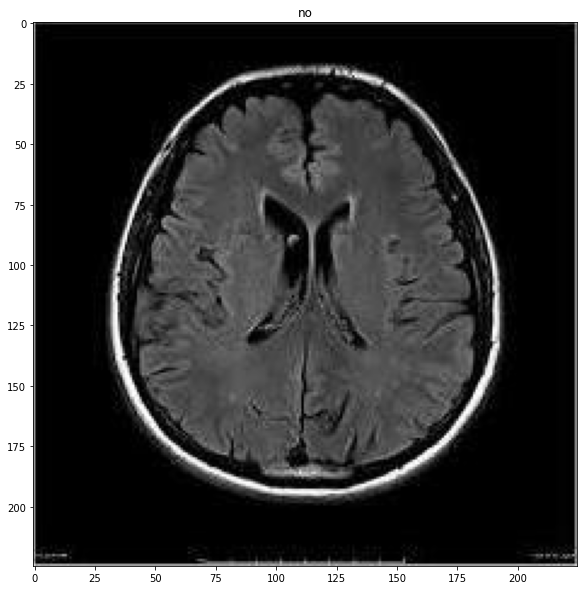

In [89]:
img = plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(TrainData["JPG"][10]))
plt.title(TrainData["Category"][10])

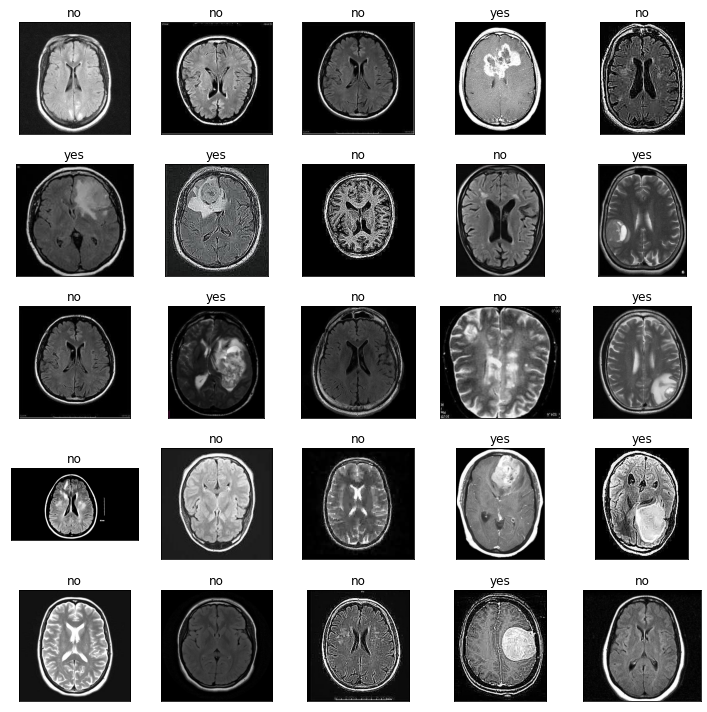

In [90]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize=(10,10),subplot_kw ={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(TrainData["JPG"][i]))
    ax.set_title(TrainData["Category"][i])

plt.tight_layout()
plt.show()

In [91]:
train_data, test_data = train_test_split(TrainData, train_size=0.9, random_state=42)
print(train_data.shape)
print(train_data.head(-1))
print("--------------"*8)
print(test_data.shape)

(2700, 2)
                                      JPG Category
433     brain-tumor-detection\yes\y23.jpg      yes
1151  brain-tumor-detection\no\no1448.jpg       no
73     brain-tumor-detection\no\no864.jpg       no
1536   brain-tumor-detection\yes\y859.jpg      yes
2709  brain-tumor-detection\no\no1478.jpg       no
...                                   ...      ...
2169   brain-tumor-detection\no\no678.jpg       no
1638    brain-tumor-detection\yes\y22.jpg      yes
1095   brain-tumor-detection\yes\y580.jpg      yes
1130   brain-tumor-detection\yes\y905.jpg      yes
1294   brain-tumor-detection\yes\y139.jpg      yes

[2699 rows x 2 columns]
----------------------------------------------------------------------------------------------------------------
(300, 2)


Image Data Generator

In [92]:
from cv2 import batchDistance


Generator = ImageDataGenerator(rescale=1./255, validation_split=0.1)

Train_Set = Generator.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="Category",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Validation_Set = Generator.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="Category",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))


Test_Set = Generator.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="Category",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.
Found 270 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [93]:
for i,j in Train_Set:
    print(i.shape)
    print(j.shape)
    break

(20, 200, 200, 1)
(20, 2)


# CNN MODEL FOR NON-DIVERSIFICATION

### MODEL STRUCTURE

In [94]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

## Model Compile

In [95]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [96]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 70s 583ms/step - loss: 0.8050 - accuracy: 0.7180 - val_loss: 0.4732 - val_accuracy: 0.7963
Epoch 2/30
120/120 [==============================] - 72s 602ms/step - loss: 0.4027 - accuracy: 0.8243 - val_loss: 0.3450 - val_accuracy: 0.8667
Epoch 3/30
120/120 [==============================] - 73s 609ms/step - loss: 0.3317 - accuracy: 0.8552 - val_loss: 0.2439 - val_accuracy: 0.9074
Epoch 4/30
120/120 [==============================] - 75s 626ms/step - loss: 0.2502 - accuracy: 0.8975 - val_loss: 0.2758 - val_accuracy: 0.8963
Epoch 5/30
120/120 [==============================] - 77s 640ms/step - loss: 0.2276 - accuracy: 0.9113 - val_loss: 0.2054 - val_accuracy: 0.9259
Epoch 6/30
120/120 [==============================] - 82s 680ms/step - loss: 0.1939 - accuracy: 0.9251 - val_loss: 0.2259 - val_accuracy: 0.9148
Epoch 7/30
120/120 [==============================] - 80s 669ms/step - loss: 0.1561 - accuracy: 0.9423 - val_loss: 0.2097 - val_ac

### Graphical Representation of our outputs

In [97]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1, len(val_losses)+1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


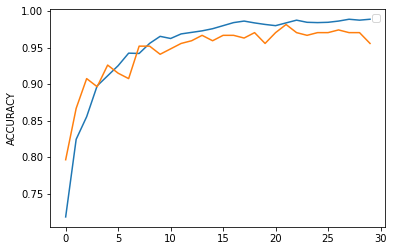

In [98]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

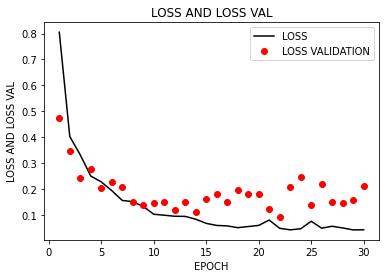

In [99]:
plt.plot(epochs, losses, "k-", label="LOSS")
plt.plot(epochs, val_losses, "ro", label="LOSS VALIDATION")
plt.title("LOSS AND LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS AND LOSS VAL")
plt.legend()
plt.show()

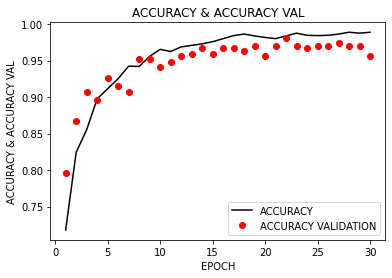

In [100]:
plt.plot(epochs, acc, "k-", label="ACCURACY")
plt.plot(epochs, val_acc, "ro", label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

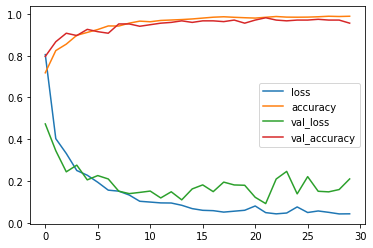

In [101]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

### OUTCOMES OF MODEL

In [102]:
Model_Results = Model.evaluate(Test_Set, verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:   " + "%.2f" % Model_Results[1])

LOSS:  0.1310
ACCURACY:   0.97


### Prediction Process

In [103]:
Main_Data_Prediction = pd.DataFrame({"JPG":testJPG_Series})

In [104]:
print(Main_Data_Prediction.head())

                                     JPG
0   brain-tumor-detection\pred\pred0.jpg
1   brain-tumor-detection\pred\pred1.jpg
2  brain-tumor-detection\pred\pred10.jpg
3  brain-tumor-detection\pred\pred11.jpg
4  brain-tumor-detection\pred\pred12.jpg


In [105]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [106]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))


Found 60 validated image filenames.


In [107]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 0s 138ms/step


In [108]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [109]:
print(Model_Test_Prediction)

[1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0]


In [110]:
Last_Prediction = []

[Last_Prediction.append('No') if i==1 else Last_Prediction.append('Tumor') for i in Model_Test_Prediction]
print(Last_Prediction)

['No', 'Tumor', 'Tumor', 'No', 'Tumor', 'Tumor', 'No', 'Tumor', 'No', 'No', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'No', 'No', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'No', 'No', 'Tumor', 'No', 'Tumor', 'Tumor', 'Tumor', 'No', 'Tumor', 'Tumor', 'Tumor', 'No', 'Tumor', 'No', 'Tumor', 'Tumor', 'No', 'Tumor', 'Tumor', 'Tumor', 'No', 'Tumor', 'No', 'Tumor', 'Tumor', 'No', 'No', 'No', 'Tumor', 'Tumor', 'Tumor', 'No', 'Tumor', 'No', 'Tumor', 'No', 'Tumor', 'No', 'Tumor']


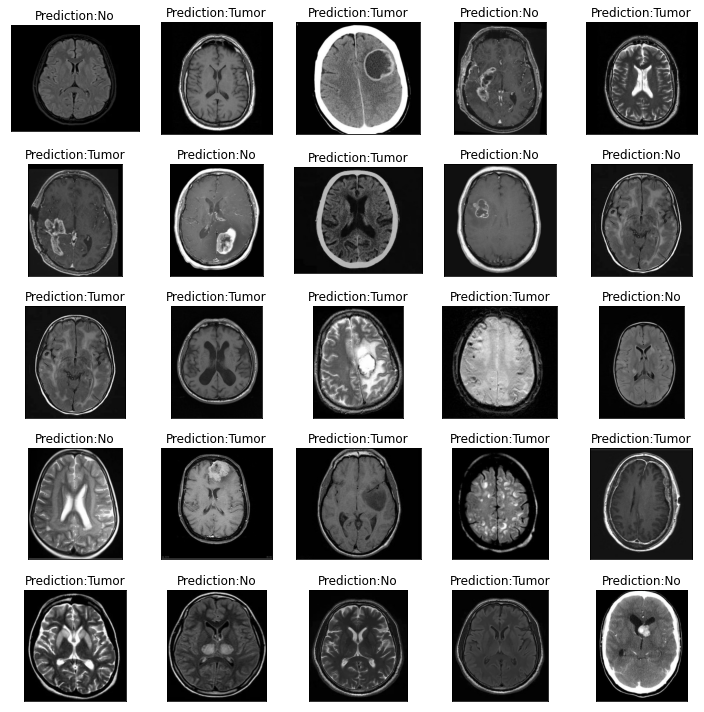

In [111]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={'xticks': [], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"Prediction:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()